In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



demographics2 = pd.read_csv('demographics2.csv')
X = demographics2.iloc[:, 2:]

y = demographics2.badteeth.values

In [72]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# copy your original data frame, which includes all variables
data_cluster = demographics2.copy()

# drop Country column
data_cluster.drop( "Country", inplace=True, axis=1)

min_max_scaler = MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(data_cluster)

#clustered_data = KMeans(n_clusters=5, random_state=0).fit_predict(data_cluster.values)
clustered_data = KMeans(n_clusters=5, random_state=0).fit_predict(X_train_minmax)

print(clustered_data)

#demo['cluster'] = pd.Series(clustered_data, index=demo.index)
df_cluster = pd.DataFrame(clustered_data)
demo_cluster = pd.concat([data_cluster, df_cluster], axis=1)
demo_cluster.rename(columns={"0": "cluster", "Unnamed: 0" : "Country"}, inplace=True)

                           

print(demo_cluster.head())
countries = list(demographics2['Country'])
teeth =list(demographics2['badteeth'])

df = pd.DataFrame({'labels' : clustered_data, 'Countries' : countries, 'badteeth' : teeth})

df.groupby('labels').describe()


[4 4 1 4 3 4 1 4 4 4 1 1 1 1 3 4 3 4 2 4 4 1 1 4 2 4 1 1 3 1 3 3 4 1 2 3 1
 1 1 1 0 1 1 3 3 0 1 1 0 1 3 1 1 1 0 0 0 0 1 3 2 1 0 2 0 0 0 0 1 0 0 0 1 3
 0 0 1 0]
   Country  badteeth  literacy_avg  water_avg      GDP_avg   sugar_avg  \
0        0      3.02     98.712978       88.0  1011.752695   49.504318   
1        1      2.30     59.752193       90.4  1625.140989   67.995227   
2        2      1.70     67.405416       38.4   318.739949   33.129091   
3        3      0.70     98.950000       98.0  7874.822798   98.443182   
4        4      2.70     98.737052       98.0  1196.023043  100.526923   

   health_avg  Low_BMI  Adolescent birth rate  Tobacco_Use  Smokers  0  
0   24.751387      1.9                   19.7         11.8     11.5  4  
1   50.424490      6.2                   12.4          9.0      5.7  4  
2   12.275108     10.3                  190.9         19.8      2.3  1  
3  259.996606      3.5                   66.8         11.9      7.4  4  
4   64.079201      2.5        

badteeth                                                     
          count      mean       std   min     25%   50%    75%   max
labels                                                              
0          18.0  1.897222  0.943160  0.60  1.2250  1.45  2.650  3.80
1          29.0  1.423448  0.965469  0.30  0.6500  1.30  2.200  3.94
2           5.0  2.728000  1.853354  1.14  1.8000  2.20  2.600  5.90
3          12.0  3.000000  1.108644  1.10  2.3750  3.30  3.425  4.90
4          14.0  2.102143  1.470417  0.50  1.0675  1.75  2.700  5.20

In [76]:
df[df['labels'] == 4]

,Countries,badteeth,labels
0,Albania,3.02,4
1,Algeria,2.30,4
3,Antigua and Barbuda,0.70,4
5,Belize,0.60,4
7,Bosnia and Herzegovina,4.80,4
8,Botswana,0.50,4
9,Brazil,2.80,4
15,China,1.03,4
17,Cuba,1.40,4
19,Egypt,1.18,4


In [63]:
model = KMeans(n_clusters=5, random_state=0).fit(X_train_minmax)
print(model.inertia_)

22.0877887452


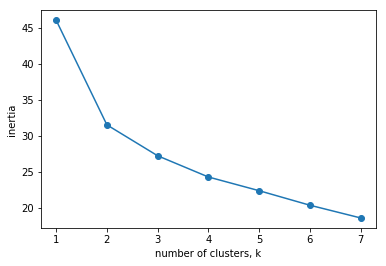

In [64]:
ks = range(1, 8)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X_train_minmax)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [65]:
threeclusters = KMeans(n_clusters=4, random_state=0).fit(X_train_minmax)
print(threeclusters.inertia_)

24.5432657016
